# Pandas

## 什么是 Pandas？

Pandas 是 Python 中最流行的数据分析库。

你可以把它想象成一个“超级版的 Excel”。它的主要工作是处理**表格数据**（在 Pandas 中称为 `DataFrame`）和**列表数据**（称为 `Series`）。

Pandas 的两大核心数据结构是：

1.  **Series（系列）**：一个带标签的一维数组，就像表格中的一列。
2.  **DataFrame（数据框）**：一个二维的表格型数据结构，有行和列，就像一个完整的 Excel 工作表或数据库表。

## Pandas 数据结构 - Series

Series 是一个带 ** 标签（索引）** 的一维数组。它由两部分组成：

  * **Values（值）**：你要存储的数据（如 `[10, 20, 30]`）。
  * **Index（索引）**：每个数据对应的标签（如 `['a', 'b', 'c']`）。

这就像一个 Python 字典，但它是有序的，并且提供了强大的数据操作能力。

### 创建 Series

我们通常从列表或字典来创建 Series。

#### 1. 从列表创建（默认索引）

如果不指定索引，Pandas 会自动创建从 0 开始的整数索引。

In [1]:
import pandas as pd

# 从列表创建
s = pd.Series([4, 7, -5, 3])
print(s)


0    4
1    7
2   -5
3    3
dtype: int64


#### 2. 从列表创建（指定索引）

你可以通过 `index` 参数自定义索引。

In [2]:
import pandas as pd

# 指定索引
s = pd.Series([4, 7, -5, 3], index=["a", "b", "c", "d"], name="my_series")
print(s)


a    4
b    7
c   -5
d    3
Name: my_series, dtype: int64


#### 3. 从字典创建

使用字典创建时，字典的键（key）会自动成为索引，值（value）成为 Series 的值。

In [3]:
import pandas as pd

dic = {"a": 4, "b": 7, "c": -5, "d": 3}
s = pd.Series(dic)
print(s)


a    4
b    7
c   -5
d    3
dtype: int64


### Series 的常用属性

属性是用来查看 Series 信息的，它们不带括号 `()`。

#### 1. 核心组件：`index` 和 `values`

  * `s.index`：获取 Series 的所有索引。
  * `s.values`：获取 Series 的所有值（以 NumPy 数组形式）。


In [4]:
import pandas as pd

s = pd.Series([11, 22, 33], index=["a", "b", "c"], name="demo")

print("--- 索引 ---")
print(s.index)

print("n--- 值 ---")
print(s.values)

--- 索引 ---
Index(['a', 'b', 'c'], dtype='object')
n--- 值 ---
[11 22 33]


#### 2. 基本信息：`dtype`, `size`, `name`

  * `s.dtype`：查看元素的数据类型。
  * `s.size`：查看元素的个数。
  * `s.name`：查看 Series 的名称。

In [5]:
import pandas as pd

s = pd.Series([11, 22, 33], index=["a", "b", "c"], name="demo")

print(f"数据类型: {s.dtype}")
print(f"元素个数: {s.size}")
print(f"Series名称: {s.name}")

数据类型: int64
元素个数: 3
Series名称: demo


#### 3. 索引器：`loc` 和 `iloc` (重点)

这是从 Series 中取值的最重要方式。

  * `s.loc[...]`：按 **标签（Label）** 索引。
  * `s.iloc[...]`：按 **位置（Integer Location）** 索引（即从 0 开始的整数位置）。

In [6]:
import pandas as pd

s = pd.Series([11, 22, 33, 44], index=["a", "b", "c", "d"])

# 1. 使用 loc (按标签)
print(f"loc['c'] 的值: {s.loc['c']}")
print("--- loc['b':'d'] (包含b和d) ---")
print(s.loc['b':'d'])

# 2. 使用 iloc (按位置)
print(f"niloc[0] 的值: {s.iloc[0]}")
print("--- iloc[1:3] (包含1, 不含3) ---")
print(s.iloc[1:3])

loc['c'] 的值: 33
--- loc['b':'d'] (包含b和d) ---
b    22
c    33
d    44
dtype: int64
niloc[0] 的值: 11
--- iloc[1:3] (包含1, 不含3) ---
b    22
c    33
dtype: int64


注意 `loc` 和 `iloc` 在切片时的区别：`loc` 包含结束标签，而 `iloc` 不包含结束位置（和 Python 列表切片一致）。

`loc` 用于你知道索引标签是什么（如 'a', 'b', 'c'）的场景。`iloc` 用于你关心数据位置（如第 1 个, 第 5 个）的场景。

### Series 的常用方法

方法是需要带括号 `()` 调用的函数，用于执行操作。

#### 1. 查看数据

  * `s.head(n)`：查看头部 n 条数据（默认 5 条）。
  * `s.tail(n)`：查看尾部 n 条数据（默认 5 条）。
  * `s.sample(n)`：随机抽取 n 条数据。

In [11]:
import pandas as pd

s = pd.Series([10, 20, 30, 40, 50, 60])

print("--- head(3) ---")
print(s.head(3))

print("n--- tail(2) ---")
print(s.tail(2))

print("n--- sample(2) ---")
print(s.sample(2))

--- head(3) ---
0    10
1    20
2    30
dtype: int64
n--- tail(2) ---
4    50
5    60
dtype: int64
n--- sample(2) ---
2    30
0    10
dtype: int64


#### 2. 统计计算

Pandas 的统计方法会自动忽略缺失值（`NaN`）。

  * `s.sum()`：求和。
  * `s.mean()`：求平均值。
  * `s.median()`：求中位数。
  * `s.max()` / `s.min()`：求最大/最小值。
  * `s.describe()`：一次性输出所有描述性统计（推荐）。


In [12]:
import pandas as pd
import numpy as np # 引入 numpy 来创建缺失值

s = pd.Series([10, 20, 30, np.nan, 50]) # np.nan 是一个缺失值

print("--- describe() 统计摘要 ---")
print(s.describe())

print(f"n平均值 (忽略NaN): {s.mean()}")

--- describe() 统计摘要 ---
count     4.000000
mean     27.500000
std      17.078251
min      10.000000
25%      17.500000
50%      25.000000
75%      35.000000
max      50.000000
dtype: float64
n平均值 (忽略NaN): 27.5


`describe()` 提供了个数（count）、平均值（mean）、标准差（std）、最小值（min）、四分位数（25%, 50%, 75%）和最大值（max）。注意 count 是 4，不是 5，因为它忽略了 `np.nan`。

#### 3. 处理缺失值

  * `s.isna()`：检查每个元素是否为缺失值（返回布尔值）。
  * `s.count()`：计算**非缺失值**的个数。

In [13]:
import pandas as pd
import numpy as np

s = pd.Series([11, 22, np.nan, None, 44]) # None 也会被视作 NaN

print("--- isna() 检查缺失值 ---")
print(s.isna())

print(f"n非缺失值个数: {s.count()}")
print(f"总元素个数 (含缺失值): {len(s)}")

--- isna() 检查缺失值 ---
0    False
1    False
2     True
3     True
4    False
dtype: bool
n非缺失值个数: 3
总元素个数 (含缺失值): 5


#### 4. 计数与去重

  * `s.value_counts()`：统计每个唯一值出现的次数（非常常用）。
  * `s.unique()`：返回一个包含所有唯一值的数组（按出现顺序）。
  * `s.nunique()`：返回唯一值的个数。

In [14]:
import pandas as pd

s = pd.Series(['a', 'b', 'a', 'c', 'b', 'a'])

print("--- value_counts() 统计频次 ---")
print(s.value_counts())

print(f"n唯一值数组: {s.unique()}")
print(f"唯一值个数: {s.nunique()}")

--- value_counts() 统计频次 ---
a    3
b    2
c    1
Name: count, dtype: int64
n唯一值数组: ['a' 'b' 'c']
唯一值个数: 3


`value_counts()` 自动按频次降序排列。

#### 5. 排序

  * `s.sort_index()`：按索引排序。
  * `s.sort_values()`：按值排序。

In [15]:
import pandas as pd

s = pd.Series([10, 50, 20], index=['c', 'a', 'b'])

print("--- 原始 Series ---")
print(s)

print("n--- sort_index() 按索引排序 ---")
print(s.sort_index())

print("n--- sort_values() 按值排序 ---")
print(s.sort_values())


--- 原始 Series ---
c    10
a    50
b    20
dtype: int64
n--- sort_index() 按索引排序 ---
a    50
b    20
c    10
dtype: int64
n--- sort_values() 按值排序 ---
c    10
b    20
a    50
dtype: int64


### Series 的布尔索引

这是 Pandas 中最强大的功能之一：**用条件来筛选数据**。

**步骤**：

1.  创建一个布尔条件（例如 `s > 10`），这会返回一个由 `True`/`False` 组成的 Series。
2.  将这个布尔 Series 传给原 Series `s[...]`，Pandas 会只保留对应位置为 `True` 的值。

In [16]:
import pandas as pd

s = pd.Series({"a": 1.2, "b": 3.5, "c": -0.8, "d": 2.9})

# 1. 创建布尔条件
condition = s > s.mean() # 找出所有大于平均值的项
print("--- 布尔条件 ---")
print(condition)

# 2. 应用布尔索引
print("n--- 筛选结果 ---")
print(s[condition])

--- 布尔条件 ---
a    False
b     True
c    False
d     True
dtype: bool
n--- 筛选结果 ---
b    3.5
d    2.9
dtype: float64


平均值是 `(1.2 + 3.5 - 0.8 + 2.9) / 4 = 1.7`。只有 'b' 和 'd' 的值大于 1.7，所以它们在布尔条件中为 `True`，最终被筛选出来。

### Series 的运算

#### 1. Series 与标量（单个数字）运算

当你对 Series 和一个数字进行运算时，该运算会**广播**到 Series 的每一个元素上。

In [17]:
import pandas as pd

s = pd.Series({"a": 1, "b": 2, "c": 3})

print(s * 10)

a    10
b    20
c    30
dtype: int64


#### 2. Series 与 Series 运算（自动对齐）

这是 Pandas 的核心特性：当两个 Series 运算时，Pandas 会**自动按索引标签对齐**数据。

  * 如果两个 Series 都有某个索引，则对相应的值进行运算。
  * 如果一个 Series 有某个索引，而另一个没有，结果中该索引对应的值为 `NaN`（缺失值）。

In [18]:
import pandas as pd

s1 = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
s2 = pd.Series([1, 2, 3], index=['b', 'c', 'd']) # 注意索引不完全相同

print(s1 + s2)

a     NaN
b    21.0
c    32.0
d     NaN
dtype: float64


  * 索引 'a'：`s1` 有 (10)，`s2` 没有，结果是 `NaN`。
  * 索引 'b'：`s1` (20) + `s2` (1) = 21。
  * 索引 'c'：`s1` (30) + `s2` (2) = 32。
  * 索引 'd'：`s1` 没有，`s2` 有 (3)，结果是 `NaN`。

## Pandas 数据结构 - DataFrame

**DataFrame 是 Pandas 的核心**。它是一个二维的表格型数据结构，就像一个 Excel 工作表或 SQL 数据库表。

它有**行索引（index）和列索引（columns）**，每列可以存储不同的数据类型（数字、字符串、布尔值等）。

你可以把 DataFrame 看作是**共享同一个行索引的多个 Series 的**集合（字典）。

### 创建 DataFrame

最常用的方法是使用 Python 字典来创建。

#### 1. 从字典创建

字典的**键（key）会成为列名（columns）**，字典的**值（value）**（通常是列表）会成为**列数据**。

In [19]:
import pandas as pd

# 字典的 key 对应列名，value 列表对应列数据
data = {
    "id": [101, 102, 103],
    "name": ["张三", "李四", "王五"],
    "age": [20, 30, 40]
}

df = pd.DataFrame(data)
print(df)


    id name  age
0  101   张三   20
1  102   李四   30
2  103   王五   40


Pandas 自动创建了从 0 开始的默认行索引。

#### 2. 创建时指定行索引和列顺序

你可以使用 `index` 参数指定行索引，使用 `columns` 参数指定你想要的列顺序。

In [20]:
import pandas as pd

data = {"age": [20, 30, 40], "name": ["张三", "李四", "王五"]}

# index 指定行索引，columns 指定列的顺序
df = pd.DataFrame(
    data=data,
    columns=["name", "age"],  # 指定列的顺序为 name 在前, age 在后
    index=["a", "b", "c"]     # 指定行索引
)
print(df)


  name  age
a   张三   20
b   李四   30
c   王五   40


### DataFrame 的常用属性

  * `df.index`：获取行索引。
  * `df.columns`：获取列索引（列名）。
  * `df.values`：获取所有值（以 NumPy 二维数组形式）。
  * `df.shape`：获取形状（(行数, 列数)）。
  * `df.dtypes`：获取每一列的数据类型。
  * `df.T`：转置（行列互换）。

In [24]:
import pandas as pd

data = {
    "id": [101, 102, 103],
    "name": ["张三", "李四", "王五"],
    "age": [20, 30, 40]
}
df = pd.DataFrame(data, index=["aa", "bb", "cc"])

print("--- 原始数据 ---")
print(df)
print("--- 原始数据 ---")
print(f"行索引: {df.index}")
print(f"列索引: {df.columns}")
print(f"形状 (行, 列): {df.shape}")
print("--- 数据类型 ---")
print(df.dtypes)
print("--- 转置 (T) ---")
print(df.T)

--- 原始数据 ---
     id name  age
aa  101   张三   20
bb  102   李四   30
cc  103   王五   40
--- 原始数据 ---
行索引: Index(['aa', 'bb', 'cc'], dtype='object')
列索引: Index(['id', 'name', 'age'], dtype='object')
形状 (行, 列): (3, 3)
--- 数据类型 ---
id       int64
name    object
age      int64
dtype: object
--- 转置 (T) ---
       aa   bb   cc
id    101  102  103
name   张三   李四   王五
age    20   30   40


### DataFrame 的数据选取 (loc 和 iloc)

这是 DataFrame 最重要、最核心的操作。

  * `df.loc[...]`：按 **标签（Label）** 索引（行标签和列标签）。
  * `df.iloc[...]`：按 **位置（Integer Location）** 索引（从 0 开始的整数位置）。

它们都使用 `[行, 列]` 的格式进行索引。

In [23]:
import pandas as pd

data = {"name": ["张三", "李四", "王五"], "age": [20, 30, 40]}
df = pd.DataFrame(data, index=["a", "b", "c"])

print("--- 原始数据 ---")
print(df)

# --- loc (按标签) ---
print("n--- loc['b'] (获取 'b' 行) ---")
print(df.loc['b']) # 获取一行，返回一个 Series

print("n--- loc['a':'b', 'name'] (获取 'a'到'b' 行的 'name' 列) ---")
print(df.loc['a':'b', 'name']) # loc 切片包含结束标签 'b'

print("n--- loc[:, ['name', 'age']] (获取所有行，但只要 'name' 和 'age' 列) ---")
print(df.loc[:, ['name', 'age']]) # : 表示所有行

# --- iloc (按位置) ---
print("n--- iloc[0] (获取第 0 行) ---")
print(df.iloc[0]) # 获取第 0 行 (标签为 'a' 的行)

print("n--- iloc[0:2, 0] (获取 0到1 行的第 0 列) ---")
print(df.iloc[0:2, 0]) # iloc 切片不包含结束位置 2

print("n--- iloc[1, 1] (获取第 1 行、第 1 列的单个值) ---")
print(df.iloc[1, 1]) # 对应 'b' 行的 'age' 列

--- 原始数据 ---
  name  age
a   张三   20
b   李四   30
c   王五   40
n--- loc['b'] (获取 'b' 行) ---
name    李四
age     30
Name: b, dtype: object
n--- loc['a':'b', 'name'] (获取 'a'到'b' 行的 'name' 列) ---
a    张三
b    李四
Name: name, dtype: object
n--- loc[:, ['name', 'age']] (获取所有行，但只要 'name' 和 'age' 列) ---
  name  age
a   张三   20
b   李四   30
c   王五   40
n--- iloc[0] (获取第 0 行) ---
name    张三
age     20
Name: a, dtype: object
n--- iloc[0:2, 0] (获取 0到1 行的第 0 列) ---
a    张三
b    李四
Name: name, dtype: object
n--- iloc[1, 1] (获取第 1 行、第 1 列的单个值) ---
30


> **快速提示：**
>
>   * 只取列：`df['列名']` (返回 Series) 或 `df[['列名1', '列名2']]` (返回 DataFrame)。
>   * 只取行：优先使用 `loc` 或 `iloc`。

### DataFrame 的常用方法

#### 1. 查看数据

  * `df.head(n)`：查看前 n 行（默认 5 行）。
  * `df.tail(n)`：查看后 n 行（默认 5 行）。
  * `df.info()`：查看 DataFrame 的**概要信息**（强烈推荐），包括索引、列类型、非空值数量和内存使用。
  * `df.describe()`：对**数值列**进行描述性统计（计数、均值、标准差、最小值、最大值等）。

In [25]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    "id": [101, 102, 103, 104, 105],
    "name": ["张三", "李四", "王五", "赵六", "冯七"],
    "age": [10, 20, 30, 40, np.nan] # 包含一个缺失值
})

print("--- head(3) ---")
print(df.head(3))

print("n--- info() 概要信息 ---")
df.info()

print("n--- describe() 统计信息 ---")
print(df.describe())

--- head(3) ---
    id name   age
0  101   张三  10.0
1  102   李四  20.0
2  103   王五  30.0
n--- info() 概要信息 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      5 non-null      int64  
 1   name    5 non-null      object 
 2   age     4 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 252.0+ bytes
n--- describe() 统计信息 ---
               id        age
count    5.000000   4.000000
mean   103.000000  25.000000
std      1.581139  12.909944
min    101.000000  10.000000
25%    102.000000  17.500000
50%    103.000000  25.000000
75%    104.000000  32.500000
max    105.000000  40.000000


#### 2. 排序

  * `df.sort_index(axis=0)`：按行索引排序（默认）。
  * `df.sort_values(by='列名')`：按指定列的值排序。

In [26]:
import pandas as pd

df = pd.DataFrame(
    data={"age": [20, 30, 10], "name": ["张三", "李四", "王五"]},
    index=[103, 101, 102]
)

print("--- 原始数据 ---")
print(df)

print("n--- 按 'age' 列升序排序 ---")
# ascending=False 可实现降序
print(df.sort_values(by="age", ascending=True))

--- 原始数据 ---
     age name
103   20   张三
101   30   李四
102   10   王五
n--- 按 'age' 列升序排序 ---
     age name
102   10   王五
103   20   张三
101   30   李四


#### 3. 统计与去重

  * `df.sum(axis=0)`：对每列求和（`axis=0`）。`axis=1` 则对每行求和。
  * `df.mean(axis=0)`：对每列求平均值。
  * `df.drop_duplicates()`：删除重复的行。

In [27]:
import pandas as pd

df = pd.DataFrame({"id": [101, 102, 101], "name": ["张三", "李四", "张三"], "age": [20, 30, 20]})

print("--- 原始数据 ---")
print(df)

print("n--- drop_duplicates() 去重后 ---")
print(df.drop_duplicates())


--- 原始数据 ---
    id name  age
0  101   张三   20
1  102   李四   30
2  101   张三   20
n--- drop_duplicates() 去重后 ---
    id name  age
0  101   张三   20
1  102   李四   30


### DataFrame 的布尔索引

和 Series 一样，你可以使用**条件**来**筛选行**。

In [28]:
import pandas as pd

df = pd.DataFrame(
    data={"age": [20, 30, 40, 10], "name": ["张三", "李四", "王五", "赵六"]},
    index=[101, 104, 103, 102]
)

# 1. 创建条件：选出 age > 25 的行
condition = df["age"] > 25
print("--- 布尔条件 ---")
print(condition)

# 2. 将条件传入 df[...]
print("n--- 筛选结果 ---")
print(df[condition])

# 也可以合并为一步
# print(df[df["age"] > 25])

--- 布尔条件 ---
101    False
104     True
103     True
102    False
Name: age, dtype: bool
n--- 筛选结果 ---
     age name
104   30   李四
103   40   王五


### DataFrame 的更改操作

#### 1. 添加/修改列

通过 `df['新列名']` 来赋值，如果列名已存在，则修改；如果不存在，则添加。

In [29]:
import pandas as pd

df = pd.DataFrame({"age": [20, 30], "name": ["张三", "李四"]})

# 1. 添加新列 "phone"
df["phone"] = ["13333333333", "14444444444"]
print("--- 添加列后 ---")
print(df)

# 2. 修改 "age" 列
df["age"] = df["age"] + 1
print("n--- 修改 age 列后 ---")
print(df)

--- 添加列后 ---
   age name        phone
0   20   张三  13333333333
1   30   李四  14444444444
n--- 修改 age 列后 ---
   age name        phone
0   21   张三  13333333333
1   31   李四  14444444444


#### 2. 删除列或行 (`drop`)

使用 `df.drop()` 方法。你需要指定要删除的**标签**以及**轴（axis）**。

  * `axis=0`：删除行（默认）。
  * `axis=1`：删除列。

In [30]:
import pandas as pd

df = pd.DataFrame({"age": [20, 30], "name": ["张三", "李四"], "id": [101, 102]}, index=['a', 'b'])
print("--- 原始数据 ---")
print(df)

# 1. 删除 'id' 列 (axis=1)
# inplace=True 会直接修改 df，而不是返回一个新 df
df.drop("id", axis=1, inplace=True)
print("n--- 删除 'id' 列后 ---")
print(df)

# 2. 删除 'a' 行 (axis=0)
df.drop('a', axis=0, inplace=True)
print("n--- 删除 'a' 行后 ---")
print(df)


--- 原始数据 ---
   age name   id
a   20   张三  101
b   30   李四  102
n--- 删除 'id' 列后 ---
   age name
a   20   张三
b   30   李四
n--- 删除 'a' 行后 ---
   age name
b   30   李四


#### 3. 更改索引

  * `df.set_index('列名')`：将某一列设为新的行索引。
  * `df.reset_index()`：重置索引，将当前的行索引还原为普通列，并使用默认的 0 开始的整数索引。

In [31]:
import pandas as pd

df = pd.DataFrame({"age": [20, 30], "name": ["张三", "李四"], "id": [101, 102]})
print("--- 原始数据 ---")
print(df)

# 1. 将 'id' 列设置为行索引
df_new = df.set_index("id")
print("n--- set_index('id') 后 ---")
print(df_new)

# 2. 重置索引
df_reset = df_new.reset_index()
print("n--- reset_index() 后 ---")
print(df_reset)

--- 原始数据 ---
   age name   id
0   20   张三  101
1   30   李四  102
n--- set_index('id') 后 ---
     age name
id           
101   20   张三
102   30   李四
n--- reset_index() 后 ---
    id  age name
0  101   20   张三
1  102   30   李四


### DataFrame 数据的导入与导出

Pandas 最强大的功能之一是读写各种数据格式。最常用的是 CSV 文件。

#### 1. 导出数据 (to_...)

  * `df.to_csv('文件名.csv')`：导出为 CSV 文件。
  * `df.to_excel('文件名.xlsx')`：导出为 Excel 文件（需要安装 `openpyxl` 包）。
  * `df.to_pickle('文件名.pkl')`：导出为 Pickle 文件（Python 专用的高效二进制格式）。

In [34]:
import pandas as pd
import os

df = pd.DataFrame({"age": [20, 30], "name": ["张三", "李四"], "id": [101, 102]})
df.set_index("id", inplace=True) # 将 id 设为索引

# 创建一个 data 文件夹（如果它不存在）
os.makedirs("data", exist_ok=True)

# 1. 导出为 CSV
# index=False 表示不将行索引（id列）保存为单独的一列
df.to_csv("data/my_data.csv")

# 如果不想保存索引，使用 index=False
# df.to_csv("data/my_data_no_index.csv", index=False)

# 2. 导出为 Excel
# (需要先运行 pip install openpyxl)
# df.to_excel("data/my_data.xlsx")

print("数据已导出到 data/my_data.csv")

数据已导出到 data/my_data.csv


#### 2. 导入数据 (read_...)

  * `pd.read_csv('文件名.csv')`：从 CSV 文件读取。
  * `pd.read_excel('文件名.xlsx')`：从 Excel 文件读取。
  * `pd.read_pickle('文件名.pkl')`：从 Pickle 文件读取。

In [35]:
import pandas as pd

# 从刚才保存的 CSV 文件中读取
# index_col=0 告诉 pandas 将第 0 列 (也就是 'id' 列) 作为行索引
df_read = pd.read_csv("data/my_data.csv", index_col="id")

print("--- 从 CSV 读取的数据 ---")
print(df_read)

--- 从 CSV 读取的数据 ---
     age name
id           
101   20   张三
102   30   李四


## Pandas 日期数据处理初识

在数据分析中，时间序列数据（如股票价格、销售记录）非常常见。但原始数据中的日期通常是字符串（text）格式，Pandas 无法直接识别。我们必须先将其转换为 Pandas 专用的“日期时间”格式，才能进行分析。

### `to_datetime()`：将字符串转换为日期

`pd.to_datetime()` 是最核心的日期转换函数。它能智能地解析各种格式的日期字符串，并将其转换为 `datetime`（日期时间）对象。

假设我们有一个包含“交易日期”的 DataFrame，但它是 `object` (字符串) 类型。

In [36]:
import pandas as pd

df = pd.DataFrame({
    "gmv": [100, 200, 300, 400],
    "trade_date": ["2025-01-06", "2023-10-31", "2023-12-31", "2023-01-05"]
})

print("--- 转换前的数据类型 ---")
df.info()

# 1. 使用 to_datetime 进行转换
df["ymd"] = pd.to_datetime(df["trade_date"])

print("\n--- 转换后的数据类型 ---")
df.info()

print("\n--- 转换结果 ---")
print(df)

--- 转换前的数据类型 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gmv         4 non-null      int64 
 1   trade_date  4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes

--- 转换后的数据类型 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   gmv         4 non-null      int64         
 1   trade_date  4 non-null      object        
 2   ymd         4 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 228.0+ bytes

--- 转换结果 ---
   gmv  trade_date        ymd
0  100  2025-01-06 2025-01-06
1  200  2023-10-31 2023-10-31
2  300  2023-12-31 2023-12-31
3  400  2023-01-05 2023-01-05


### `.dt` 访问器：提取日期组件

一旦有了 `datetime` 类型的列（如上一步的 `ymd` 列），就可以使用 `.dt` 访问器来“解锁”该列所有的时间属性，如年、月、日、星期等。

继续使用上一步的 `df`。

In [37]:
# 1. 获取年月日
df['year'] = df['ymd'].dt.year
df['month'] = df['ymd'].dt.month
df['day'] = df['ymd'].dt.day

# 2. 获取星期、季度
df['weekday_name'] = df['ymd'].dt.day_name() # 获取星期几的名称
df['quarter'] = df['ymd'].dt.quarter

# 3. 判断是否为月底/年底
df['is_month_end'] = df['ymd'].dt.is_month_end
df['is_year_end'] = df['ymd'].dt.is_year_end

# 打印我们感兴趣的列
cols_to_show = ['ymd', 'year', 'month', 'weekday_name', 'quarter', 'is_year_end']
print(df[cols_to_show])

         ymd  year  month weekday_name  quarter  is_year_end
0 2025-01-06  2025      1       Monday        1        False
1 2023-10-31  2023     10      Tuesday        4        False
2 2023-12-31  2023     12       Sunday        4         True
3 2023-01-05  2023      1     Thursday        1        False


这是特征工程（Feature Engineering）的关键步骤。例如，提取“月份”来分析月度销售趋势，提取“星期”来比较工作日和周末的订单量。

### `to_period()`：获取统计周期

有时我们不只想要“月份”这个数字（如 1, 2, 3），而是想要一个代表**完整统计周期**的标签（如 '2025-01'）。`.dt.to_period()` 函数就是用来创建这种周期标签的。

`freq` (频率) 参数是关键：

  * `'D'`：按天 (Day)
  * `'W'`：按周 (Week)
  * `'M'`：按月 (Month)
  * `'Q'`：按季 (Quarter)
  * `'Y'` 或 `'A'`：按年 (Year)

In [38]:
# 将日期转换为 统计周期
df["month_period"] = df["ymd"].dt.to_period("M")
df["quarter_period"] = df["ymd"].dt.to_period("Q")
df["year_period"] = df["ymd"].dt.to_period("Y")

cols_to_show = ['ymd', 'month_period', 'quarter_period', 'year_period']
print(df[cols_to_show])

         ymd month_period quarter_period year_period
0 2025-01-06      2025-01         2025Q1        2025
1 2023-10-31      2023-10         2023Q4        2023
2 2023-12-31      2023-12         2023Q4        2023
3 2023-01-05      2023-01         2023Q1        2023


在制作数据透视表或分组聚合（`groupby`）时极其有用。例如，你可以直接按 `month_period` 列分组，来统计每个月的 GMV 总和，而不需要先提取年份再提取月份。

## DataFrame 数据分析入门

本节使用 `weather.csv` 天气数据集进行演练。

该数据集包含以下六个字段：

1. **date**: 日期，格式为年-月-日 (YYYY-MM-DD)
   - 示例: `2025-11-12`

2. **precipitation**: 降水量
   - 示例: `15.5`

3. **temp_max**: 最高温度
   - 示例: `28.5`

4. **temp_min**: 最低温度
   - 示例: `18.2`

5. **wind**: 风力
   - 示例: `5 km/h`

6. **weather**: 天气状况
   - 示例: `drizzle`, `rain`

### 加载与查看数据

数据分析的第一步是加载数据，并了解它的基本情况。

`pd.read_csv()` 用于读取 CSV 文件。`df.info()` 和 `df.head()` 是我们了解数据的“左膀右臂”。

  * `df.head()`：查看前 5 行，快速了解数据长什么样。
  * `df.info()`：查看 DataFrame 的“体检报告”，包括每列的名称、非空值数量、数据类型（Dtype）和内存占用。

In [39]:
import pandas as pd

# 1. 加载数据
df = pd.read_csv("data/weather.csv")

# 2. 查看数据概览
print("--- 基本信息 (info) ---")
df.info()

print("\n--- 查看前 5 行 (head) ---")
print(df.head())

--- 基本信息 (info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB

--- 查看前 5 行 (head) ---
         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


### 数据选取（复习）

  * **取列**：`df['列名']` (返回 Series) 或 `df[['列名1', '列名2']]` (返回 DataFrame)。
  * **取行**：`df.loc[行标签]` 或 `df.iloc[行位置]`。
  * **取指定行列**：`df.loc[行标签, 列标签]` 或 `df.iloc[行位置, 列位置]`。

In [40]:
# 1. 获取 'temp_max' 和 'temp_min' 两列
cols = df[["temp_max", "temp_min"]]
print(cols.head())

# 2. 获取行标签为 1, 10, 100 的数据
rows = df.loc[[1, 10, 100]]
print(rows)

# 3. 获取前 10 行的 'date' 和 'weather' 列
# loc 的切片 :10 包含 10， iloc 的切片 :10 不包含 10
# 这里我们用 iloc (按位置)
subset = df.iloc[:10, [0, 5]] # 0是'date'列, 5是'weather'列
print(subset)

   temp_max  temp_min
0      12.8       5.0
1      10.6       2.8
2      11.7       7.2
3      12.2       5.6
4       8.9       2.8
           date  precipitation  temp_max  temp_min  wind weather
1    2012-01-02           10.9      10.6       2.8   4.5    rain
10   2012-01-11            0.0       6.1      -1.1   5.1     sun
100  2012-04-10            0.0      17.8       8.9   3.2    rain
         date  weather
0  2012-01-01  drizzle
1  2012-01-02     rain
2  2012-01-03     rain
3  2012-01-04     rain
4  2012-01-05     rain
5  2012-01-06     rain
6  2012-01-07     rain
7  2012-01-08      sun
8  2012-01-09     rain
9  2012-01-10     rain


### 分组聚合 (Groupby)

这是 Pandas 中最强大的功能之一，它遵循“**拆分-应用-合并**”（Split-Apply-Combine）的模式。

`df.groupby('分组列')` 先将数据按指定列（如“月份”）拆分成若干组，然后对每组数据应用一个聚合函数（如 `.mean()` 求平均值），最后将结果合并起来。

**代码示例**：统计每个月的平均最高和最低温度。

In [41]:
# 1. (准备工作) 将 'date' 列转换为日期类型，并提取“月份”
# 这里用 .astype(str) 是为了让分组键更清晰
df["month"] = pd.to_datetime(df["date"]).dt.to_period("M").astype(str)

# 2. (核心) 按 'month' 分组，然后选取 'temp_max' 和 'temp_min' 列，最后计算平均值
month_temp_mean = df.groupby("month")[["temp_max", "temp_min"]].mean()

print(month_temp_mean.head())

          temp_max  temp_min
month                       
2012-01   7.054839  1.541935
2012-02   9.275862  3.203448
2012-03   9.554839  2.838710
2012-04  14.873333  5.993333
2012-05  17.661290  8.190323


### 基本绘图

Pandas 自带了 `.plot()` 方法（基于 Matplotlib 库），可以对 DataFrame 或 Series 快速绘图。

**代码示例**：将上一步的分组结果直接绘制成折线图。

<Axes: xlabel='month'>

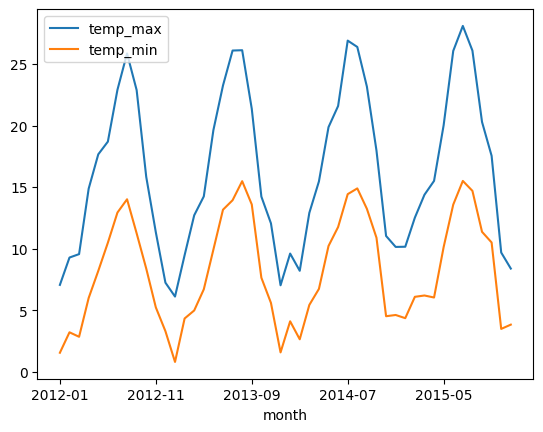

In [42]:
# (确保在 Jupyter Notebook 或类似环境中运行，才能显示图像)
# .plot() 默认绘制折线图
month_temp_mean.plot()

### 常用统计值

`df.describe()` 是获取数据统计摘要的最快方法。

In [43]:
# 默认只统计数值型列
print("--- 默认统计 (数值列) ---")
print(df.describe())

# include='all' 会把 object 类型的列也包含进来
print("\n--- 统计所有列 (include='all') ---")
print(df.describe(include='all'))

--- 默认统计 (数值列) ---
       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000

--- 统计所有列 (include='all') ---
              date  precipitation     temp_max     temp_min         wind  \
count         1461    1461.000000  1461.000000  1461.000000  1461.000000   
unique        1461            NaN          NaN          NaN          NaN   
top     2012-01-01            NaN          NaN          NaN          NaN   
freq             1            NaN          NaN          NaN          NaN   
mean           NaN       3.029

对于 `object` 列（如 `weather`），它会显示 `unique`（唯一值数量）、`top`（出现次数最多的值）和 `freq`（top 值的出现次数）。

### 常用排序方法

  * `df.sort_values(by='列名')`：按值排序（最常用）。
  * `df.nlargest(n, '列名')`：获取某列最大的 n 条记录。
  * `df.nsmallest(n, '列名')`：获取某列最小的 n 条记录。

**代码示例 1**：找到最高温度最大的 30 天，并从中找出最低温度最小的 5 天。

In [44]:
# 链式操作：一步一步筛选
top_30_hot = df.nlargest(30, "temp_max")
top_5_cool_in_hot = top_30_hot.nsmallest(5, "temp_min")

print(top_5_cool_in_hot)

            date  precipitation  temp_max  temp_min  wind weather    month
250   2012-09-07            0.0      32.2      13.3   3.1     sun  2012-09
1305  2015-07-29            0.0      32.2      14.4   3.8     sun  2015-07
945   2014-08-03            0.0      31.7      14.4   2.6     sun  2014-08
1280  2015-07-04            0.0      33.3      15.0   2.9     sun  2015-07
979   2014-09-06            0.0      32.2      15.0   2.9     sun  2014-09


**代码示例 2**：找出每年的最高温度记录（按年去重）。

In [45]:
# 1. (准备工作) 提取 'year' 列
df["year"] = pd.to_datetime(df["date"]).dt.to_period("Y").astype(str)

# 2. (核心) 先按 'year' 升序，再按 'temp_max' 降序 排序
df_sort = df.sort_values(["year", "temp_max"], ascending=[True, False])

# 3. (核心) 按 'year' 去重，保留每组的第一行 (因为已排序，第一行就是最大值)
df_yearly_max = df_sort.drop_duplicates(subset="year")

print(df_yearly_max)

            date  precipitation  temp_max  temp_min  wind weather    month  \
228   2012-08-16            0.0      34.4      18.3   2.8     sun  2012-08   
546   2013-06-30            0.0      33.9      17.2   2.5     sun  2013-06   
953   2014-08-11            0.5      35.6      17.8   2.6    rain  2014-08   
1295  2015-07-19            0.0      35.0      17.2   3.3     sun  2015-07   

      year  
228   2012  
546   2013  
953   2014  
1295  2015  


## Pandas 的数据组合函数

### `concat`：堆叠连接

`pd.concat()` 像“贴胶带”一样，把多个 DataFrame **按轴**（行或列）堆叠在一起。

  * `axis=0` (默认)：按行堆叠（往下贴）。
  * `axis=1`：按列堆叠（往右贴）。

**代码示例 1**：按行堆叠（最常用）。

In [46]:
df1 = pd.DataFrame(data={"a": [1, 2], "b": [4, 5]}, index=[1, 2])
df2 = pd.DataFrame(data={"a": [7, 8], "b": [10, 11]}, index=[1, 2])

# 默认按行 (axis=0) 堆叠
# 注意行索引 [1, 2] 重复了
df_row = pd.concat([df1, df2])
print("--- 索引重复 ---")
print(df_row)

# 使用 ignore_index=True 来重置索引
df_row_reset = pd.concat([df1, df2], ignore_index=True)
print("\n--- 重置索引 (ignore_index=True) ---")
print(df_row_reset)

--- 索引重复 ---
   a   b
1  1   4
2  2   5
1  7  10
2  8  11

--- 重置索引 (ignore_index=True) ---
   a   b
0  1   4
1  2   5
2  7  10
3  8  11


**代码示例 2**：按列堆叠（`axis=1`）。

In [47]:
df1 = pd.DataFrame(data={"a": [1, 2]}, index=[1, 2])
df2 = pd.DataFrame(data={"b": [10, 11]}, index=[1, 2]) # 索引相同

# 按列 (axis=1) 堆叠
df_col = pd.concat([df1, df2], axis=1)
print(df_col)


   a   b
1  1  10
2  2  11


### `merge`：SQL 式合并

`pd.merge()` 是 Pandas 中最重要的合并函数，它**根据一个或多个共同的“键”（Key）**（即列）来合并两个 DataFrame，类似于 SQL 中的 `JOIN`。

#### 1. 默认合并（Inner Join）

`merge` 会自动寻找两个 DataFrame 中**同名的列**（如 `employee` 列）作为键，然后执行“内连接”（`how='inner'`），只保留双方都存在的键。

In [48]:
df1 = pd.DataFrame(
    {"employee": ["Bob", "Jake", "Lisa", "Sue"], "group": ["Accounting", "Engineering", "Engineering", "HR"]}
)
df2 = pd.DataFrame({"employee": ["Lisa", "Bob", "Jake", "Sue"], "hire_date": [2004, 2008, 2012, 2014]})

# 自动找到 'employee' 列作为键
df3 = pd.merge(df1, df2)
print(df3)

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


#### 2. `how` 参数：指定连接方式

  * `how='inner'` (默认)：内连接。只保留两个表中**共同**的键。
  * `how='left'`：左连接。保留**左表**所有的键，右表没有的填 `NaN`。
  * `how='right'`：右连接。保留**右表**所有的键，左表没有的填 `NaN`。
  * `how='outer'`：外连接。保留**两个表所有**的键，缺失的互相填 `NaN`。

In [49]:
df1 = pd.DataFrame({"name": ["Peter", "Paul", "Mary"], "food": ["fish", "beans", "bread"]})
df2 = pd.DataFrame({"name": ["Mary", "Joseph"], "drink": ["wine", "beer"]})

# 只有 'Mary' 是共同的
print("--- how='inner' (默认) ---")
print(pd.merge(df1, df2, how="inner")) # on='name' 是自动的

print("n--- how='left' (保留 df1 的所有人) ---")
print(pd.merge(df1, df2, how="left"))

--- how='inner' (默认) ---
   name   food drink
0  Mary  bread  wine
n--- how='left' (保留 df1 的所有人) ---
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


#### 3. `left_on` 和 `right_on`：键名不同时

当两个表要连接的键（列）名称不同时（如 `df1` 的 `employee` 和 `df2` 的 `name`），使用 `left_on` 和 `right_on` 分别指定。

In [50]:
df1 = pd.DataFrame({"employee": ["Bob", "Jake"], "group": ["Accounting", "Engineering"]})
df2 = pd.DataFrame({"name": ["Bob", "Jake"], "salary": [70000, 80000]})

df3 = pd.merge(df1, df2, left_on="employee", right_on="name")
print(df3)

  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000


注意结果中 `employee` 和 `name` 两列都保留了（通常我们会删掉一个）。

`merge` 是数据分析的核心。例如，将“订单表”和“用户表”通过 `user_id` 合并，将“商品表”和“库存表”通过 `sku_id` 合并。

## Pandas 的缺失值处理函数

### 识别缺失值

Pandas 使用 `NaN` (Not a Number) 来表示缺失值。`df.isnull()` 或 `df.isna()` 用来检查缺失值（返回 `True`/`False`）。

**最常用的命令**：`df.isnull().sum()`，用于**统计每列有多少个缺失值**。

In [51]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/weather_withna.csv")

# 统计每列的缺失值总数
print(df.isnull().sum())

date               0
precipitation    303
temp_max         303
temp_min         303
wind             303
weather          303
dtype: int64


### 剔除缺失值 (`dropna`)

`df.dropna()` 用于丢弃包含缺失值的行或列。

  * `df.dropna()` (默认)：删除**任何**包含 `NaN` 值的**行**。
  * `df.dropna(axis=1)`：删除**任何**包含 `NaN` 值的**列**。
  * `df.dropna(subset=['col1', 'col2'])`：**(推荐)** 只检查特定列（`subset`），如果这些列中有 `NaN`，才删除该**行**。

In [52]:
df = pd.DataFrame({"A": [1, 2, np.nan], "B": [4, np.nan, 6], "C": [7, 8, 9]})
print("--- 原始数据 ---")
print(df)

print("n--- 默认 dropna() (删除第 1, 2 行) ---")
print(df.dropna())

print("n--- 按列 dropna(axis=1) (删除 A, B 列) ---")
print(df.dropna(axis=1))

print("n--- 按子集 dropna(subset=['A']) (只删除第 2 行) ---")
print(df.dropna(subset=['A']))

--- 原始数据 ---
     A    B  C
0  1.0  4.0  7
1  2.0  NaN  8
2  NaN  6.0  9
n--- 默认 dropna() (删除第 1, 2 行) ---
     A    B  C
0  1.0  4.0  7
n--- 按列 dropna(axis=1) (删除 A, B 列) ---
   C
0  7
1  8
2  9
n--- 按子集 dropna(subset=['A']) (只删除第 2 行) ---
     A    B  C
0  1.0  4.0  7
1  2.0  NaN  8


### 填充缺失值 (`fillna`)

`df.fillna()` 用于将 `NaN` 替换为指定的值。

  * `df.fillna(0)`：用固定值（如 0）填充。
  * `df.fillna(df['col'].mean())`：用统计值（如均值、中位数）填充。
  * `df.fillna(method='ffill')`：用**前一个**有效值填充（Forward Fill）。
  * `df.fillna(method='bfill')`：用**后一个**有效值填充（Backward Fill）。

In [53]:
df = pd.DataFrame({"temp_max": [25, np.nan, 30, np.nan], "wind": [4, 5, np.nan, 3]})
print("--- 原始数据 ---")
print(df)

print("n--- 1. 用 0 填充 ---")
print(df.fillna(0))

print("n--- 2. 用均值填充 (推荐) ---")
# 分别计算 temp_max 的均值和 wind 的均值来填充
df_filled = df.fillna(df.mean())
print(df_filled)

print("n--- 3. 用 ffill (前向填充) ---")
print(df.ffill())

--- 原始数据 ---
   temp_max  wind
0      25.0   4.0
1       NaN   5.0
2      30.0   NaN
3       NaN   3.0
n--- 1. 用 0 填充 ---
   temp_max  wind
0      25.0   4.0
1       0.0   5.0
2      30.0   0.0
3       0.0   3.0
n--- 2. 用均值填充 (推荐) ---
   temp_max  wind
0      25.0   4.0
1      27.5   5.0
2      30.0   4.0
3      27.5   3.0
n--- 3. 用 ffill (前向填充) ---
   temp_max  wind
0      25.0   4.0
1      25.0   5.0
2      30.0   5.0
3      30.0   3.0


## Pandas 的 apply 函数

### Series.apply

对 Series 中的**每一个元素**应用一个自定义函数。

In [54]:
s = pd.Series([10, 20, 30])

# 定义一个函数（或使用 lambda）
def func(item):
    return item * 20

print(s.apply(func))

# 使用 lambda 表达式更简洁
print(s.apply(lambda item: item * 20))

0    200
1    400
2    600
dtype: int64
0    200
1    400
2    600
dtype: int64


### DataFrame.apply

`df.apply()` 沿着 DataFrame 的一个轴（行或列）应用函数。

  * `axis=0` (默认)：按列。函数会作用于**每一列**（该列作为一个 Series 传入）。
  * `axis=1`：按行。函数会作用于**每一行**（该行作为一个 Series 传入）。

**代码示例 1**：`axis=0` (按列)

In [55]:
df = pd.DataFrame({"a": [10, 20, 30], "b": [40, 50, 60]})

# 函数 func 会接收 'a' 列 (一个 Series)，然后接收 'b' 列 (一个 Series)
def func(s): # s 是一个 Series (一列)
    return s.sum()

print(df.apply(func)) # 等价于 df.apply(func, axis=0)

a     60
b    150
dtype: int64


**代码示例 2**：`axis=1` (按行，最常用)

这是 `apply` 最强大的用法。函数会接收**每一行**数据（该行作为一个 Series，其索引是列名），允许你基于多列计算新值。

In [56]:
df = pd.DataFrame({"a": [10, 20, 30], "b": [40, 50, 60]})

# 函数 func 每次接收一行 (一个 Series)
# 比如第一次接收 s['a']=10, s['b']=40
def func(s): # s 是一个 Series (一行)
    return s["a"] / s["b"]

print(df.apply(func, axis=1))

0    0.25
1    0.40
2    0.50
dtype: float64


## Pandas 的数据聚合、转换与过滤

### `DataFrameGroupBy` 对象：分组的“半成品”

什么是 `DataFrameGroupBy` 对象？**

当你对一个 DataFrame 调用 `.groupby()` 时（例如 `df.groupby("department_id")`），Pandas 并不会马上计算。

相反，它会返回一个 `DataFrameGroupBy` 对象。你可以把它看作是一个“半成品”：它是一个包含了所有分组信息（哪个部门有哪些行）的“盒子”，正**等待你告诉它要对这些组做什么**（例如，求平均、求和、还是过滤）。

In [57]:
import pandas as pd

df = pd.read_csv("data/employees.csv") # 读取员工数据

# 按 department_id 分组，返回一个 DataFrameGroupBy 对象
gb = df.groupby("department_id")
print(gb)

#### 1. 查看分组

  * `.groups`：查看分组情况（字典，键为组名，值为行索引）。
  * `.get_group(name)`：获取指定名称的组（返回一个 DataFrame）。

In [58]:
# 查看分组情况（部分展示）
# {10.0: [100], 20.0: [101, 102], ...}
print(df.groupby("department_id").groups)

# 获取 50 号部门的所有员工数据
print(df.groupby("department_id").get_group(50).head())

{10.0: [100], 20.0: [101, 102], 30.0: [14, 15, 16, 17, 18, 19], 40.0: [103], 50.0: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 60.0: [3, 4, 5, 6, 7], 70.0: [104], 80.0: [45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79], 90.0: [0, 1, 2], 100.0: [8, 9, 10, 11, 12, 13], 110.0: [105, 106]}
    employee_id first_name last_name     email  phone_number  job_id  salary  \
20          120    Matthew     Weiss    MWEISS  650.123.1234  ST_MAN  8000.0   
21          121       Adam     Fripp    AFRIPP  650.123.2234  ST_MAN  8200.0   
22          122      Payam  Kaufling  PKAUFLIN  650.123.3234  ST_MAN  7900.0   
23          123     Shanta   Vollman  SVOLLMAN  650.123.4234  ST_MAN  6500.0   
24          124      Kevin   Mourgos  KMOURGOS  650.123.5234  ST_MAN  5800.0   

    com

#### 2. 按组迭代

`GroupBy` 对象可以直接在 for 循环中迭代，每次返回（组名, 组对应的 DataFrame）。

In [59]:
# 迭代每个部门
for dept_id, group_df in df.groupby("department_id"):
    print(f"n--- 部门 {dept_id} (共 {group_df.shape[0]} 人) ---")
    print(group_df[['first_name', 'last_name', 'salary']].head(2)) # 只看前2人

n--- 部门 10.0 (共 1 人) ---
    first_name last_name  salary
100   Jennifer    Whalen  4400.0
n--- 部门 20.0 (共 2 人) ---
    first_name  last_name   salary
101    Michael  Hartstein  13000.0
102        Pat        Fay   6000.0
n--- 部门 30.0 (共 6 人) ---
   first_name last_name   salary
14        Den  Raphaely  11000.0
15  Alexander      Khoo   3100.0
n--- 部门 40.0 (共 1 人) ---
    first_name last_name  salary
103      Susan    Mavris  6500.0
n--- 部门 50.0 (共 45 人) ---
   first_name last_name  salary
20    Matthew     Weiss  8000.0
21       Adam     Fripp  8200.0
n--- 部门 60.0 (共 5 人) ---
  first_name last_name  salary
3  Alexander    Hunold  9000.0
4      Bruce     Ernst  6000.0
n--- 部门 70.0 (共 1 人) ---
    first_name last_name   salary
104    Hermann      Baer  10000.0
n--- 部门 80.0 (共 34 人) ---
   first_name last_name   salary
45       John   Russell  14000.0
46      Karen  Partners  13500.0
n--- 部门 90.0 (共 3 人) ---
  first_name last_name   salary
0     Steven      King  24000.0
1      N_ann   Ko

#### 3. 按多字段分组

你可以传入一个列表来实现按多个字段分组。

In [60]:
# 按 部门 和 工种 两个维度分组
gb_multi = df.groupby(["department_id", "job_id"])

# 分组后计算平均工资
salary_mean = gb_multi["salary"].mean()
print(salary_mean.head())

department_id  job_id  
10.0           AD_ASST      4400.0
20.0           MK_MAN      13000.0
               MK_REP       6000.0
30.0           PU_CLERK     2780.0
               PU_MAN      11000.0
Name: salary, dtype: float64


**结果（复合索引）：**

注意索引现在有两层（`department_id` 和 `job_id`）。

> **实用技巧：`as_index=False`**
>
> 如果你不希望分组的字段成为索引，而希望它们保留为普通列，请使用 `as_index=False`。

In [61]:
salary_mean = df.groupby(["department_id", "job_id"], as_index=False)[
    "salary"
].mean()
print(salary_mean.head())

   department_id    job_id   salary
0           10.0   AD_ASST   4400.0
1           20.0    MK_MAN  13000.0
2           20.0    MK_REP   6000.0
3           30.0  PU_CLERK   2780.0
4           30.0    PU_MAN  11000.0


**结果（扁平索引）：**

`department_id` 和 `job_id` 现在是普通的列。

#### 4. `cut()`：分组的得力助手

`pd.cut()` 能将**连续的数值数据**（如薪资、年龄）自动**分割成离散的区间**（即“分箱”）。

这对于 `groupby` 尤其有用，因为你可以按“薪资范围”而不是按“具体的薪资”来进行分组。

In [62]:
# 选取 9 到 15 行的薪资数据
salaries = df.iloc[9:16]["salary"]
print("--- 原始薪资 ---")
print(salaries)

# 1. 自动均分为 3 个箱
salary_bins = pd.cut(salaries, 3, labels=["low", "medium", "high"])
print("n--- 自动分 3 箱 (带标签) ---")
print(salary_bins)

# 2. 自定义区间
# (0, 10000], (10000, 20000]
salary_bins_custom = pd.cut(salaries, [0, 10000, 20000])
print("n--- 自定义 2 箱 ---")
print(salary_bins_custom)

--- 原始薪资 ---
9      9000.0
10     8200.0
11     7700.0
12     7800.0
13     6900.0
14    11000.0
15     3100.0
Name: salary, dtype: float64
n--- 自动分 3 箱 (带标签) ---
9       high
10    medium
11    medium
12    medium
13    medium
14      high
15       low
Name: salary, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']
n--- 自定义 2 箱 ---
9         (0, 10000]
10        (0, 10000]
11        (0, 10000]
12        (0, 10000]
13        (0, 10000]
14    (10000, 20000]
15        (0, 10000]
Name: salary, dtype: category
Categories (2, interval[int64, right]): [(0, 10000] < (10000, 20000]]


### 分组聚合

聚合（Aggregation）是 `groupby` 最常见的操作。它将一个组的数据（多行）“浓缩”成一个单一的值（例如 `mean`, `sum`, `count`）。

#### 1. 常用聚合函数

  * `sum()`: 求和
  * `mean()`: 平均值
  * `count()`: 非空元素个数
  * `size()`: 所有元素个数 (包括空值)
  * `min()` / `max()`: 最小/最大值
  * `median()`: 中位数
  * `std()` / `var()`: 标准差 / 方差
  * `nunique()`: 唯一值个数

In [63]:
# 计算每个部门的平均薪资
print(df.groupby("department_id")["salary"].mean().head())
# 计算每个部门的人数
print(df.groupby("department_id")["employee_id"].count().head())

department_id
10.0    4400.000000
20.0    9500.000000
30.0    4150.000000
40.0    6500.000000
50.0    3475.555556
Name: salary, dtype: float64
department_id
10.0     1
20.0     2
30.0     6
40.0     1
50.0    45
Name: employee_id, dtype: int64


#### 2. `.agg()`：更灵活的聚合

`.agg()` (或 `.aggregate()`) 方法允许你一次性应用多个函数，或者对不同列应用不同函数。

**示例 1：对一列应用多个函数**

In [64]:
# 按部门分组，计算 salary 的 最小值、中位数、最大值
agg_stats = df.groupby("department_id")["salary"].agg(["min", "median", "max"])
print(agg_stats.head())

                  min  median      max
department_id                         
10.0           4400.0  4400.0   4400.0
20.0           6000.0  9500.0  13000.0
30.0           2500.0  2850.0  11000.0
40.0           6500.0  6500.0   6500.0
50.0           2100.0  3100.0   8200.0


**示例 2：对不同列应用不同函数（使用字典）**

In [65]:
# 按部门分组：
# - 统计 job_id 的种类数 (nunique)
# - 统计 commission_pct 的平均值 (mean)
agg_dict = df.groupby("department_id").agg({
    "job_id": "nunique",
    "commission_pct": "mean"
})

# 重命名列以提高可读性
agg_dict_renamed = agg_dict.rename(columns={
    "job_id": "工种数",
    "commission_pct": "佣金比例平均值"
})

print(agg_dict_renamed.head())

               工种数  佣金比例平均值
department_id              
10.0             1      NaN
20.0             2      NaN
30.0             2      NaN
40.0             1      NaN
50.0             3      NaN


NaN表示该部门无人有佣金

### 分组转换

`agg` vs `transform`**

  * **`agg` (聚合)**：返回一个**缩小**的结果。每组返回一行。
  * **`transform` (转换)**：返回一个与**原始 DataFrame 形状相同**的结果。它将计算结果（例如组的均值）“广播”回原始的每一行。

**示例 1：数据标准化（每人的工资减去 *其所在部门* 的平均工资）**

In [66]:
# 1. 计算每个部门的平均工资 (这是一个 Series，索引为 department_id)
dept_mean_salary = df.groupby("department_id")["salary"].mean()

# 2. 使用 transform 计算每组的平均值，并广播回原始的每一行
dept_mean_broadcasted = df.groupby("department_id")["salary"].transform('mean')

# 3. 计算差值
df['salary_diff_from_dept_mean'] = df['salary'] - dept_mean_broadcasted

# 查看 50 号部门的几个员工
print(df[df['department_id'] == 50][['first_name', 'salary', 'salary_diff_from_dept_mean']].head())

   first_name  salary  salary_diff_from_dept_mean
20    Matthew  8000.0                 4524.444444
21       Adam  8200.0                 4724.444444
22      Payam  7900.0                 4424.444444
23     Shanta  6500.0                 3024.444444
24      Kevin  5800.0                 2324.444444


`transform` 使得我们可以在*原始行级别*上进行基于组的计算。

**示例 2：用“组内均值”填充缺失值（非常实用）**

这是 `transform` 的一个“杀手级应用”。

In [67]:
import numpy as np
# 1. 随机制造一些缺失值
na_index = pd.Series(df.index.tolist()).sample(30)
df.loc[na_index, "salary"] = np.nan

# 2. 定义一个函数，用组的均值填充组内的 NaN
def fill_missing(x): # x 是一个组的 salary (Series)
    # 如果整个组都是 NaN，则均值也是 NaN，此时用 0 填充
    group_mean = x.mean()
    if pd.isna(group_mean):
        return x.fillna(0)
    else:
        return x.fillna(group_mean)

# 3. (核心) 使用 transform 应用这个函数
df["salary_filled"] = df.groupby("department_id")["salary"].transform(fill_missing)

print("填充前 50 号部门的缺失值计数:", df[df['department_id']==50]['salary'].isnull().sum())
print("填充后 50 号部门的缺失值计数:", df[df['department_id']==50]['salary_filled'].isnull().sum())

填充前 50 号部门的缺失值计数: 16
填充后 50 号部门的缺失值计数: 0


### 分组过滤

`filter` 用于**保留或丢弃整个组**。

它会遍历每个组，应用你提供的函数（该函数必须返回 `True` 或 `False`）。如果返回 `True`，则**保留**该组的所有行；如果返回 `False`，则**丢弃**该组的所有行。

**示例：只保留那些“所有员工都有佣金比例”的部门**

In [68]:
# 1. 定义一个过滤函数
def filter_func(x): # x 是一个组 (DataFrame)
    # 检查 x 组的 'commission_pct' 列
    # .notnull() 返回 True/False
    # .all() 检查是否全部为 True
    return x["commission_pct"].notnull().all()

# 2. (核心) 应用 filter
commission_all_df = df.groupby("department_id").filter(filter_func)

print("--- 过滤前的部门列表 (部分) ---")
print(df['department_id'].unique())
print("n--- 过滤后的部门列表 (只剩 80 号部门) ---")
print(commission_all_df['department_id'].unique())

--- 过滤前的部门列表 (部分) ---
[ 90.  60. 100.  30.  50.  80.  nan  10.  20.  40.  70. 110.]
n--- 过滤后的部门列表 (只剩 80 号部门) ---
[80.]


## Pandas 透视表 (`pivot_table`)

### 什么是透视表？

透视表（Pivot Table）是一种数据汇总工具，它能将“长格式”的数据重塑为“宽格式”（类似电子表格的矩阵）。

`pivot_table` 本质上是 `groupby` 的一种特殊形式，专门用于生成二维的交叉表。

### `pivot_table()` 方法

`pivot_table` 的四个核心参数：

  * `data`：(仅用于 `pd.pivot_table`) 要操作的 DataFrame。
  * `values`：要**聚合**的列（单元格中的数值）。
  * `index`：要分组并作为**行**索引的列。
  * `columns`：要分组并作为**列**索引的列。
  * `aggfunc`：聚合函数，默认为 `'mean'`（求平均值）。

### 案例：睡眠质量分析

使用 `sleep.csv` 数据集。

# sleep数据集字段说明

该数据集包含以下 13 个字段：

1. **person_id**
   每个人的唯一标识符。
   - 示例：`1`, `102`, `A05`

2. **gender**
   个人的性别（男/女）。
   - 示例：`Male`, `Female` 或 `男`, `女`

3. **age**
   个人的年龄（以岁为单位）。
   - 示例：`25`, `43`

4. **occupation**
   个人的职业或就业状况（例如办公室职员、体力劳动者、学生）。
   - 示例：`Office Worker`, `Manual Laborer`, `Student`

5. **sleep_duration**
   每天的睡眠总小时数。
   - 示例：`6.5`, `8.0`

6. **sleep_quality**
   睡眠质量的主观评分，范围从 1（差）到 10（极好）。
   - 示例：`3`, `7`, `9`

7. **physical_activity_level**
   每天花费在体力活动上的时间（以分钟为单位）。
   - 示例：`30`, `75`, `120`

8. **stress_level**
   压力水平的主观评级，范围从 1（低）到 10（高）。
   - 示例：`2`, `5`, `8`

9. **bmi_category**
   个人的 BMI 分类。
   - 可能取值：`Underweight（体重过轻）`、`Normal（正常）`、`Overweight（超重）`、`Obese（肥胖）`

10. **blood_pressure**
    血压测量，显示为收缩压与舒张压的数值。
    - 示例：`120/80`, `135/90`

11. **heart_rate**
    静息心率，以每分钟心跳次数为单位。
    - 示例：`65`, `78`

12. **daily_steps**
    个人每天行走的步数。
    - 示例：`4500`, `10000`

13. **sleep_disorder**
    是否存在睡眠障碍及其类型。
    - 可能取值：`None（无）`、`Insomnia（失眠）`、`Sleep Apnea（睡眠呼吸暂停）`


In [69]:
df_sleep = pd.read_csv("data/sleep.csv")
print(df_sleep[['gender', 'age', 'occupation', 'sleep_duration', 'stress_level', 'sleep_quality']].head())

   gender  age     occupation  sleep_duration  stress_level  sleep_quality
0    Male   29   Manual Labor             7.4             7            7.0
1  Female   43        Retired             4.2             5            4.9
2    Male   44        Retired             6.1             4            6.0
3    Male   29  Office Worker             8.3            10           10.0
4    Male   67        Retired             9.1             4            9.5


#### 1. 基本透视表（行 `index` + 值 `values`）

**目标**：统计不同睡眠时间、不同压力等级下的**平均睡眠质量**。

In [70]:
# 1. (准备工作) 先用 cut 对连续数据分箱
df_sleep['sleep_duration_stage'] = pd.cut(df_sleep["sleep_duration"], [0, 6, 7, 8, 12])
df_sleep['stress_level_stage'] = pd.cut(df_sleep["stress_level"], 3, labels=['Low', 'Mid', 'High'])

# 2. (核心) 创建透视表
pivot_1 = df_sleep.pivot_table(
    values="sleep_quality",              # 值：计算睡眠质量
    index=["sleep_duration_stage", "stress_level_stage"], # 行：按睡眠分箱 和 压力分箱
    aggfunc="mean"                       # 聚合：求平均
)
print(pivot_1)

                                         sleep_quality
sleep_duration_stage stress_level_stage               
(0, 6]               Low                      6.591304
                     Mid                      5.853125
                     High                     6.236667
(6, 7]               Low                      6.405263
                     Mid                      5.230769
                     High                     5.545455
(7, 8]               Low                      5.963158
                     Mid                      6.812500
                     High                     5.700000
(8, 12]              Low                      6.078481
                     Mid                      6.059016
                     High                     6.260606


/var/folders/t_/7nnlk6vd6636n2yds3_5gm6h0000gn/T/ipykernel_15790/1991756844.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_1 = df_sleep.pivot_table(


#### 2. 添加列维度 (`columns`)

**目标**：在上例基础上，进一步按“职业”拆分**列**。

In [71]:
pivot_2 = df_sleep.pivot_table(
    values="sleep_quality",
    index="sleep_duration_stage",   # 行：睡眠分箱
    columns="occupation",           # 列：按职业
    aggfunc="mean",
    fill_value=0                    # 用 0 填充缺失的组合
)
print(pivot_2.head())

occupation            Manual Labor  Office Worker   Retired   Student
sleep_duration_stage                                                 
(0, 6]                    6.073333       6.275000  5.868182  6.807143
(6, 7]                    6.133333       5.271429  6.578571  5.436842
(7, 8]                    5.166667       6.075000  6.326667  6.272727
(8, 12]                   6.070370       6.108929  5.947727  6.373077


/var/folders/t_/7nnlk6vd6636n2yds3_5gm6h0000gn/T/ipykernel_15790/3693160056.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_2 = df_sleep.pivot_table(


## Pandas 时间序列

### Pandas 中的日期与时间

Pandas 提供了强大的工具来处理日期和时间，其核心是 `datetime64[ns]` 类型。

  * **`Timestamp`**: 代表一个单独的时间点（例如 '2025-01-01 09:00'）。
  * **`DatetimeIndex`**: `Timestamp` 对象的索引，是时间序列分析的基础。
  * **`Timedelta`**: 代表两个时间点之间的时间差（例如 '5 days 02:00:00'）。

#### 1. `pd.to_datetime()`：转换的瑞士军刀

这是你最需要掌握的函数。它能将字符串或数字智能地转换为 `datetime64` 类型。

In [72]:
# 1. 转换单个字符串
ts = pd.to_datetime("2025-01-01")
print(f"类型: {type(ts)}, 值: {ts}")

# 2. 转换一个 Series (列)
df = pd.read_csv("data/weather.csv")
print(f"n转换前 'date' 列的类型: {df['date'].dtype}")

df['date'] = pd.to_datetime(df['date'])
print(f"转换后 'date' 列的类型: {df['date'].dtype}")

# 3. (高级) 在读取时直接转换
# df = pd.read_csv("data/weather.csv", parse_dates=['date']) # 或者 parse_dates=[0]

类型: <class 'pandas._libs.tslibs.timestamps.Timestamp'>, 值: 2025-01-01 00:00:00
n转换前 'date' 列的类型: object
转换后 'date' 列的类型: datetime64[ns]


#### 2. `.dt` 访问器

一旦一个列是 `datetime64` 类型，你就可以使用 `.dt` 访问器来提取日期的各个部分。

In [73]:
# 确保 'date' 列已转换
df['date'] = pd.to_datetime(df['date'])

df["year"] = df['date'].dt.year
df["month"] = df['date'].dt.month
df["day_name"] = df['date'].dt.day_name()
df["quarter"] = df['date'].dt.to_period("Q") # 转换为季度周期

print(df[["date", "year", "month", "day_name", "quarter"]].head())

        date  year  month   day_name quarter
0 2012-01-01  2012      1     Sunday  2012Q1
1 2012-01-02  2012      1     Monday  2012Q1
2 2012-01-03  2012      1    Tuesday  2012Q1
3 2012-01-04  2012      1  Wednesday  2012Q1
4 2012-01-05  2012      1   Thursday  2012Q1


### 使用时间作为索引

这是时间序列分析的**核心**。当你将 `date` 列设置为索引时，DataFrame 会“感知”到时间，从而解锁强大的时间切片功能。

In [74]:
# 1. 确保 'date' 列是 datetime 类型
df['date'] = pd.to_datetime(df['date'])

# 2. 将 'date' 列设置为索引
df.set_index('date', inplace=True)

print("--- Index 类型 ---")
print(type(df.index))

print("n--- 获取 2015 年的所有数据 ---")
print(df.loc["2015"].head())

print("n--- 获取 2013 年 1 月到 6 月的数据 ---")
print(df.loc["2013-01":"2013-06"].tail())

--- Index 类型 ---
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
n--- 获取 2015 年的所有数据 ---
            precipitation  temp_max  temp_min  wind weather  year  month  \
date                                                                       
2015-01-01            0.0       5.6      -3.2   1.2     sun  2015      1   
2015-01-02            1.5       5.6       0.0   2.3    rain  2015      1   
2015-01-03            0.0       5.0       1.7   1.7     fog  2015      1   
2015-01-04           10.2      10.6       3.3   4.5    rain  2015      1   
2015-01-05            8.1      12.2       9.4   6.4    rain  2015      1   

            day_name quarter  
date                          
2015-01-01  Thursday  2015Q1  
2015-01-02    Friday  2015Q1  
2015-01-03  Saturday  2015Q1  
2015-01-04    Sunday  2015Q1  
2015-01-05    Monday  2015Q1  
n--- 获取 2013 年 1 月到 6 月的数据 ---
            precipitation  temp_max  temp_min  wind weather  year  month  \
date                                            

### `date_range()`：生成时间序列

`pd.date_range()` 是一个用于快速创建 `DatetimeIndex` 的便捷工具。

In [77]:
# 1. 默认频率（'D' - 天）
print("--- 默认按天 ---")
print(pd.date_range("2025-01-01", "2025-01-05"))

# 2. 指定周期数
print("n--- 指定周期数 (periods=5) ---")
print(pd.date_range("2025-01-01", periods=5))

# 3. 指定频率 (freq='h' 小时, 'M' 月末, 'B' 工作日)
print("n--- 指定频率 (freq='h') ---")
print(pd.date_range("2025-01-01", periods=5, freq="h"))

print("n--- 指定频率 (freq='M') ---")
print(pd.date_range("2025-01-01", periods=5, freq="M"))

--- 默认按天 ---
DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05'],
              dtype='datetime64[ns]', freq='D')
n--- 指定周期数 (periods=5) ---
DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05'],
              dtype='datetime64[ns]', freq='D')
n--- 指定频率 (freq='h') ---
DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 01:00:00',
               '2025-01-01 02:00:00', '2025-01-01 03:00:00',
               '2025-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='h')
n--- 指定频率 (freq='M') ---
DatetimeIndex(['2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
               '2025-05-31'],
              dtype='datetime64[ns]', freq='ME')


/var/folders/t_/7nnlk6vd6636n2yds3_5gm6h0000gn/T/ipykernel_15790/2326632253.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  print(pd.date_range("2025-01-01", periods=5, freq="M"))


### `resample()`：时间序列的 `groupby`

`resample()` 是**时间序列数据专属的 `groupby`**。它按指定的时间频率（如 `'M'` 月、`'Q'` 季、`'YE'` 年末）对数据进行分组。

与 `groupby` 一样，`resample()` 也是一个“半成品”，你必须在后面链上一个聚合函数（如 `.mean()`, `.sum()`, `.count()`）来触发计算。

**代码示例**：将每日天气数据**重采样**为**年度平均**温度。

In [79]:
df = pd.read_csv("data/weather.csv")

# 1. 确保 'date' 是 datetime 类型并设为索引
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 2. (核心) 按 'YE' (Year-End, 年末) 重采样，然后计算均值
# 'YE' 表示以每年12月31日为时间戳
df_yearly_mean = df[["temp_max", "temp_min"]].resample("YE").mean()

print(df_yearly_mean)

             temp_max  temp_min
date                           
2012-12-31  15.276776  7.289617
2013-12-31  16.058904  8.153973
2014-12-31  16.995890  8.662466
2015-12-31  17.427945  8.835616
